## Import relevant packages

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn import preprocessing

## Import data

In [44]:
data = pd.read_csv("Mercer GDS Performance 2019-05-16 filtered.csv") # Change this file to do a different analysis

In [45]:
data

,Query,Clicks,Impressions,CTR,Position
0,mercer advisors,5108,7998,0.64,1.01
1,mercer global advisors,707,1149,0.62,1.01
2,mercer advisors denver,231,539,0.43,1.02
3,mercer financial,216,726,0.30,2.92
4,mercer financial services,184,760,0.24,9.83
5,mercer advisors careers,156,252,0.60,1.04
6,merceradvisors,139,166,0.84,1.00
7,mercer pension plan login,119,664,0.18,3.46
8,mercer advisors houston,103,200,0.50,1.02
9,mercer global advisors inc,80,153,0.52,1.00


## Make the scatterplot

Text(0, 0.5, 'CTR')

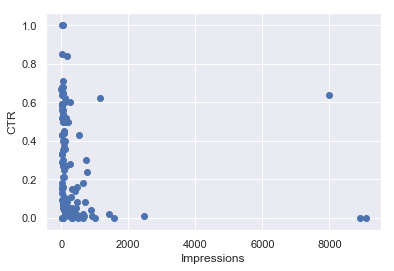

In [46]:
plt.scatter(data['Impressions'],data['CTR'])
plt.xlabel("Impressions")
plt.ylabel("CTR")

## Select only relevant columns for clustering

In [47]:
x = data[['Impressions', 'CTR']].copy()

## Standardization

In [48]:
x_scaled = preprocessing.scale(x) # the message below is not an error, don't worry about it

/Users/jenyalestina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


## Clustering

In [49]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [50]:
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)

Text(0, 0.5, 'CTR')

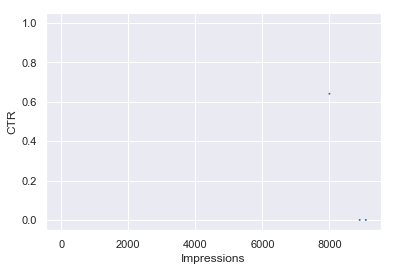

In [51]:
plt.scatter(clusters['Impressions'],clusters['CTR'],clusters['cluster_pred'], cmap='rainbow')
plt.xlabel("Impressions")
plt.ylabel("CTR")

## Decide how many clusters are best

In [52]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

wcss

[280.0,
 149.87000971798466,
 41.95626233732048,
 27.207140776736555,
 21.004744077727256,
 16.174551939682686,
 11.504089161080435,
 8.828251024451102,
 7.153986758061504]

Text(0, 0.5, 'WCSS')

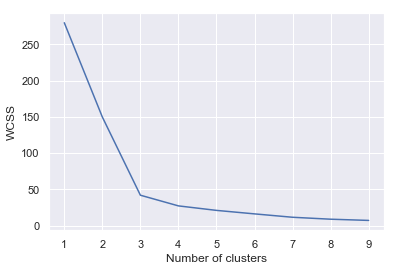

In [53]:
plt.plot(range(1,10),wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

In [57]:
kmeans_new = KMeans(4) # change this value to change number of clusters, don't touch anything else
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

In [58]:
clusters_new

,Impressions,CTR,cluster_pred
0,7998,0.64,1
1,1149,0.62,3
2,539,0.43,0
3,726,0.30,0
4,760,0.24,0
5,252,0.60,3
6,166,0.84,3
7,664,0.18,2
8,200,0.50,3
9,153,0.52,3


## Create the final, color-coded analysis

Text(0, 0.5, 'CTR')

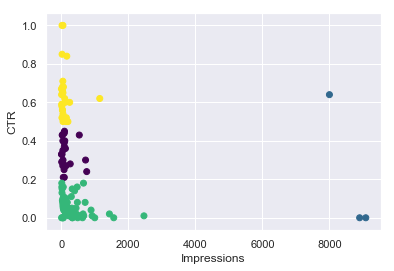

In [59]:
plt.scatter(clusters_new['Impressions'],clusters_new['CTR'],c=clusters_new['cluster_pred'],cmap='viridis')
plt.xlabel("Impressions")
plt.ylabel("CTR")